#### Coursera Capstone Project - The Battle of Neighborhoods Final Report (Week 1 and 2) By Murt Sayeed

# 1. Introduction Section

#### Background:
In United States, the City of New York is the most populous city with its diverse and financial district reputation. It is also very multicultural with many business opportunities and attracts many different players into the market. It is a global capital of everything, such as  banking & finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the United States. The city is seen as most diverse city on the planet, having close to 9 million people and over 800 languages.

The city can also be very competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analyzed carefully. The insights derived from analysis will not only give good understanding of the business environment but also give general idea to a person on what kind of leisure activity can be done in the city. 

#### Problem:


A restaurant is a business that prepares and/or serves food & drink to customers. In any major city, the food is an important part of an ethnically diverse urban complex. The City of New York is famous for its excellent cuisine. It's food culture includes an many different types of international cuisines influenced by the city's immigrant history. This city is home to over one thousand of the finest and most diverse restaurants. So it is evident that we can call New York a mini heaven for many tourists or any foodie who wants try meals that are different and in such search one needs to be strategic about what and where to try these meals.

The idea of this capstone project is to show various segments the neighborhoods within New York City with their most popular cuisines. Through this analysis, we can figure out if food has any relationship with the diversity of a neighborhood. Our analysis will help us understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering’ unsupervised machine learning algorithm.  

#### Target Audience:

We are here to understand how different cultures and cuisines are placed all over New York City’ neighborhood. This information or process of results can be used by many organization and people. A simple tourist visiting New York City, a New Yorker or traveling organizations such as expedia or tripadvisor can help people find meals or cuisine. In addition, this information can be used as a business opportunities and can be utilized by a new business owner on where or where not to open a restaurant. A government entity can also utilized such information to study overall impact and structure of immigrant, restaurants and/or diverse cuisine.  

# 2. Data Section

#### Data Required:
We will analyzed New York City in this capstone project. The main dataset will be from link (https://geo.nyu.edu/catalog/nyu_2451_34572), with a total of 5 boroughs and 306 neighborhoods. We will segment the
neighborhoods in the city and explore various restaurants with the latitude and longitude coordinates of each neighborhood. This dataset will provide the addresses of neighborhood of NYC in json format. We will also use Foursquare API, a location data provider, to make RESTful API calls to retrieve data about venues in different neighborhoods.


# 3. Methodology Section

Uploading required libraries and dependencies.

In [75]:
import time
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

from collections import Counter # count occurrences 
from pprint import pprint # data pretty printer
from bs4 import BeautifulSoup  # library to handle web scraping

import os

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### Load and explore the data:

A dataset was required to segment the neighborhoods of New York City and this data should contain appropriate boroughs and the neighborhoods. It should also must contains the latitude and longitude coordinates. The data link is provided above. Once the .json file is downloaded, we will structure it to fully understand the relevant fields. The data will be transferred to pandas dataframe, by looping through the data and filling the dataframe rows one at a time using the following depicted loop. 

New York City Data:
We have to format the city data to be readable and contains proper boroughs and its neighborhoods, all including their exact location via latitude and longitude coordinates. The data is online at https://geo.nyu.edu/catalog/nyu_2451_34572 and the json format https://cocl.us/new_york_dataset/newyork_data.json

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


The relevant data is in the features key, which is basically a list of the neighborhoods. We will define a new variable that includes this data and a look at the first item in this list.

In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
type(newyork_data)

dict

In [5]:
print ("newyork_data key and value's length are: ") 
for key, value in newyork_data.items(): 
    print (key, len(str(value)))

newyork_data key and value's length are: 
type 17
totalFeatures 3
features 124743
crs 70
bbox 74


In [6]:
neighborhoods_data = newyork_data['features']
print(neighborhoods_data[305])

{'type': 'Feature', 'id': 'nyu_2451_34572.306', 'geometry': {'type': 'Point', 'coordinates': [-74.08173992211962, 40.61731079252983]}, 'geometry_name': 'geom', 'properties': {'name': 'Fox Hills', 'stacked': 2, 'annoline1': 'Fox', 'annoline2': 'Hills', 'annoline3': None, 'annoangle': 0.0, 'borough': 'Staten Island', 'bbox': [-74.08173992211962, 40.61731079252983, -74.08173992211962, 40.61731079252983]}}


#### Transform the data into a dataframe pandas:
The next step is to transform the data of nested Python dictionaries into a pandas dataframe. We will start by creating an empty dataframe and take a look at the empty dataframe to confirm that the columns/rows. Then loop through the data and fill the dataframe one row at a time. Finally, examine top rows of resulting dataframe.


In [7]:
#define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

#instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [8]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]))

The dataframe has 5 boroughs and 306 neighborhoods.


#### Add latitude and longitude: 
Import latitude and longitude values of New York City via geopy library. Also, we will be creating a map through Folium tool. User can zoom in/out and click on the map to know the neighborhood and its borough.

In [11]:
address = 'New York City, NY'
location = None

#define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [12]:
#create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

#add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Foursquare:
Now, we will use the Foursquare API to explore the neighborhoods and segment them. There are many endpoints available on Foursquare for various GET requests. But, to explore the cuisines, it is required that all the venues extracted are from ‘Food’ category. Foursquare Venue Category Hierarchy is retrieved and the returned request is further analyzed. We found that there are 10 major or parent categories of venues. 

In [13]:
CLIENT_ID = 'AOFQFSDESFDIE3ALOBJOIGHAQEUA4SW03PYVEJZWWPMNBCCY' # your Foursquare ID
CLIENT_SECRET = 'F1I40IRFXIWMIKV33HML5G1EGGLLP5Y2LUQPH51JYA5GQU23' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AOFQFSDESFDIE3ALOBJOIGHAQEUA4SW03PYVEJZWWPMNBCCY
CLIENT_SECRET:F1I40IRFXIWMIKV33HML5G1EGGLLP5Y2LUQPH51JYA5GQU23


In [14]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [15]:
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [16]:
category_list = category_results['response']['categories']

In [17]:
len(category_list)

10

In [18]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


#### Defining Food:
The ‘FOOD’ category in the above depiction is the matter of interest. We will create a function to return a dictionary with ‘Category ID’ & ‘Category Name’ of ‘Food’ & it's sub-categories. This function takes the parent ‘Category ID’ and returns the ‘Category Name’ and ‘Category ID’ of all the sub-categories. 

In [19]:
#function to flatten a 'parent_id' category, returns all categories if checkParentID = False.
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [20]:
#this function takes the parent ID and returns 'name' and 'id' of all the sub-categories.
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

#### Test the neighborhood results of GET Request:
We will try to get the neighborhood's name and its latitude and longitude values to confirm data. Then, we will request the 'Food' that is in neighborhood within a radius of 1000 meters. The first neighborhood returned is ‘Co-op City’ with Latitude 40.87 and Longitude -73.82. Afterwards, a GET request URL will be created to search for Venue with ‘Category ID’ ='4d4b7105d754a06374d81259', which is the ‘Category ID’ for ‘Food’, and radius = 1000 meters. 

In [21]:
neighborhoods.loc[1, 'Neighborhood']

'Co-op City'

In [22]:
neighborhood_latitude = neighborhoods.loc[1, 'Latitude'] #neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[1, 'Longitude'] #neighborhood longitude value

neighborhood_name = neighborhoods.loc[1, 'Neighborhood'] #neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Co-op City are 40.87429419303012, -73.82993910812398.


In [23]:
LIMIT = 1 #limit of number of venues returned by Foursquare API
radius = 1000 #define radius
categoryId = '4d4b7105d754a06374d81259' #category ID for "Food"

#create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url #display URL

'https://api.foursquare.com/v2/venues/search?&client_id=AOFQFSDESFDIE3ALOBJOIGHAQEUA4SW03PYVEJZWWPMNBCCY&client_secret=F1I40IRFXIWMIKV33HML5G1EGGLLP5Y2LUQPH51JYA5GQU23&v=20180605&ll=40.87429419303012,-73.82993910812398&radius=1000&categoryId=4d4b7105d754a06374d81259&limit=1'

In [24]:
results = requests.get(url).json()

In [25]:
results['response']['venues']

[{'id': '5857fd5094c69045281cb50f',
  'name': "Dunkin'",
  'location': {'address': '1930 Bartow Ave',
   'crossStreet': 'Edson Ave',
   'lat': 40.86780008007166,
   'lng': -73.8333645677676,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.86780008007166,
     'lng': -73.8333645677676}],
   'distance': 778,
   'postalCode': '10469',
   'cc': 'US',
   'city': 'Bronx',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['1930 Bartow Ave (Edson Ave)',
    'Bronx, NY 10469',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d148941735',
    'name': 'Donut Shop',
    'pluralName': 'Donut Shops',
    'shortName': 'Donuts',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/donuts_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1578921881',
  'hasPerk': False}]

#### Creating a function:
In above example, the category name of the venue 'Dunkin'. We are targeting to segment NYC neighborhoods through the lens of various food. We will have to do similar process of this food data for all the 306 neighborhoods.

We need to create a function ‘getNearbyFood’ to repeat this process below for all neighborhoods:

-Loop through neighborhoods, make the API request URL with radius=1000, LIMIT=100; make the GET request

-Individual neighborhood, return only relevant information for each nearby venue

-Append all nearby venues to a list and unfold the list & append it to dataframe being returned

The categoryId parameter in the API request URL can be a comma seperated string. So, we create a comma separated string from category_dict. But this process is redundant because if a top-level category is specified in the GET Request, all sub-categories will also match the query. But it is an interesting way to retrieve all the sub-categories ID with name. We will also use pickle library to serialize the information retrieved from GET requests. This step will counter any redundant requests to the Foursquare API.

In [26]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

In [27]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=100):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

#### Pickle
We will use Pickle library to add serial to the information retrieved from GET requests and to make a persistent ‘.pkl’ file. This data file can later be deserialized to retrieve an exact python object structure.

In [28]:
import pickle #to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("completed")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("completed")

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 0 venues with incompelete information.
completed


#### Machine Learning: Exploratory Data 
The combined dataframe ‘nyc_venues’ will have the required information with the size 13,935 venues. There are also 197 unique categories with Deli and Pizza on the top.

Sorting Data:
We should show the size of our dataframe and see its unique categories by removing general categories since we are planned to explore diverse food. First, we inputted all the unique categories into a python ‘list' so after we can create our general list. We reduced the data noise by almost half, resulting in 101 unique food categories from 197.

In [29]:
print(nyc_venues.shape)
nyc_venues.head()

(13935, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Pitman Deli,40.894149,-73.845748,Food
1,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
2,Wakefield,40.894705,-73.847201,McDonald's,40.902645,-73.849485,Fast Food Restaurant
3,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop
4,Wakefield,40.894705,-73.847201,Burger King,40.895540,-73.856460,Fast Food Restaurant


In [30]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))
nyc_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 197 uniques categories.


Venue Category
Deli / Bodega                               1073
Pizza Place                                 1035
Coffee Shop                                  896
Donut Shop                                   645
Chinese Restaurant                           625
Fast Food Restaurant                         620
Bakery                                       555
Italian Restaurant                           555
American Restaurant                          428
Café                                         396
Bagel Shop                                   361
Caribbean Restaurant                         352
Sandwich Place                               313
Mexican Restaurant                           311
Diner                                        299
Fried Chicken Joint                          289
Restaurant                                   232
Ice Cream Shop                               225
Food                                         212
Burger Joint                                 184
Food 

In [31]:
#list the categories to explore further.
unique_categories = nyc_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Food, Dessert Shop, Fast Food Restaurant, Donut Shop, Caribbean Restaurant, Comfort Food Restaurant, Ice Cream Shop, Burger Joint, Fried Chicken Joint, Chinese Restaurant, Food Truck, Pizza Place, Steakhouse, Southern / Soul Food Restaurant, American Restaurant, Spanish Restaurant, Deli / Bodega, Latin American Restaurant, Sandwich Place, Bagel Shop, Bakery, Seafood Restaurant, Coffee Shop, Mexican Restaurant, Dumpling Restaurant, Restaurant, BBQ Joint, Frozen Yogurt Shop, Italian Restaurant, Diner, Grocery Store, Juice Bar, Café, Breakfast Spot, Wings Joint, Asian Restaurant, Empanada Restaurant, Tapas Restaurant, Japanese Restaurant, Sushi Restaurant, Greek Restaurant, Bar, Indian Restaurant, Thai Restaurant, Vegetarian / Vegan Restaurant, New American Restaurant, Cuban Restaurant, Lounge, Pub, Irish Pub, Fish & Chips Shop, Gas Station, Cafeteria, Salvadoran Restaurant, Soup Place, Other Nightlife, Hot Dog Joint, Snack Place, Arcade, Food Court, French Restaurant, Convenience Store, 

In [32]:
#lets make a list of generalized categories so we can only have unique values later.
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Deli / Bodega','Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'Irish Pub','College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market','Mac & Cheese Joint','Creperie',
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [33]:
#fetch all the required unique food categories.
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Malay Restaurant, Japanese Restaurant, Dutch Restaurant, Pakistani Restaurant, Swiss Restaurant, Mediterranean Restaurant, BBQ Joint, South Indian Restaurant, Israeli Restaurant, Polish Restaurant, North Indian Restaurant, Thai Restaurant, Latin American Restaurant, Arepa Restaurant, Burrito Place, Himalayan Restaurant, Taco Place, Portuguese Restaurant, Tapas Restaurant, Brazilian Restaurant, Udon Restaurant, Kebab Restaurant, Indian Chinese Restaurant, Szechuan Restaurant, Shabu-Shabu Restaurant, Falafel Restaurant, Caribbean Restaurant, English Restaurant, Modern Greek Restaurant, Taiwanese Restaurant, Fried Chicken Joint, Soba Restaurant, Asian Restaurant, Cantonese Restaurant, Southern / Soul Food Restaurant, Middle Eastern Restaurant, Tex-Mex Restaurant, Indian Restaurant, Colombian Restaurant, Lebanese Restaurant, Australian Restaurant, Filipino Restaurant, Whisky Bar, Chinese Restaurant, Noodle House, Peruvian Restaurant, Steakhouse, Dosa Place, Dim Sum Restaurant, Jazz Club, V

In [34]:
nyc_venues = nyc_venues[nyc_venues['Venue Category'].isin(food_categories)].reset_index()
nyc_venues.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2,Wakefield,40.894705,-73.847201,McDonald's,40.902645,-73.849485,Fast Food Restaurant
1,4,Wakefield,40.894705,-73.847201,Burger King,40.895540,-73.856460,Fast Food Restaurant
2,5,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant
3,7,Wakefield,40.894705,-73.847201,Golden Krust Caribbean Restaurant,40.903773,-73.850051,Caribbean Restaurant
4,9,Wakefield,40.894705,-73.847201,McDonald's,40.892779,-73.857473,Fast Food Restaurant


In [35]:
print('There are {} unique FOOD categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 101 unique FOOD categories.


In [36]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))

There are 3336 uniques venues.


#### Looking further into each Neighborhood:
We will try to show top 10 food categories in NYC by counting venues of each category in each neighborhood. We will also show some statistical data of each neighborhood and the frequency of venues. The below process is taken forth by using ‘one hot encoding’ function of python pandas library, where it converts the categorical variables into a form that could be provided to ML algorithms to do a better job in prediction. Afterwards, we will add column (Neighborhood) to see the results. For example, we can see that in the first five neighborhoods of the dataframe, Annadale, Arden Heights and Arlington have 3, 3, 2 ‘American Restaurant’ in its vicinity. With the help of some statistics below, we can find the top venue categories; such as Korean Restaurant, Chinese
Restaurant and Caribbean Restaurant as top three.

In [37]:
#one hot encoding.
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head(10)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#now add column "neighborhood" to our new dataframe.
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 
nyc_onehot.head(10)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [39]:
#switch the same column "neighborhood" to the front
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head(10)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [40]:
nyc_onehot.shape

(6879, 102)

In [41]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(10)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Annadale,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arden Heights,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Arverne,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Astoria,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
Astoria Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,4,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Auburndale,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,4,0,0,0,0,0,0,2,0,0,0,0,10,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
venue_counts_described = venue_counts.describe().transpose()

In [43]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Korean Restaurant,302.0,0.364238,2.263339,0.0,0.0,0.0,0.00,35.0
Chinese Restaurant,302.0,2.069536,1.879722,0.0,1.0,2.0,3.00,14.0
Caribbean Restaurant,302.0,1.165563,2.551608,0.0,0.0,0.0,1.00,14.0
Indian Restaurant,302.0,0.291391,0.965101,0.0,0.0,0.0,0.00,12.0
Italian Restaurant,302.0,1.837748,2.093376,0.0,0.0,1.0,3.00,12.0
Pizza Place,302.0,3.427152,2.031232,0.0,2.0,3.0,5.00,10.0
Fast Food Restaurant,302.0,2.052980,1.950511,0.0,0.0,2.0,3.00,10.0
Seafood Restaurant,302.0,0.533113,0.825605,0.0,0.0,0.0,1.00,8.0
Latin American Restaurant,302.0,0.476821,0.987190,0.0,0.0,0.0,1.00,8.0
Fried Chicken Joint,302.0,0.956954,1.228726,0.0,0.0,1.0,1.75,6.0


In [44]:
venue_top10_list = venue_top10.index.values.tolist()

#### Data Visualization:
We can visualize the top 10 categories via bar graph using python seaborn library. There is also a table of neighborhood grouped together and the frequency of each category is calculated by taking the mean. 

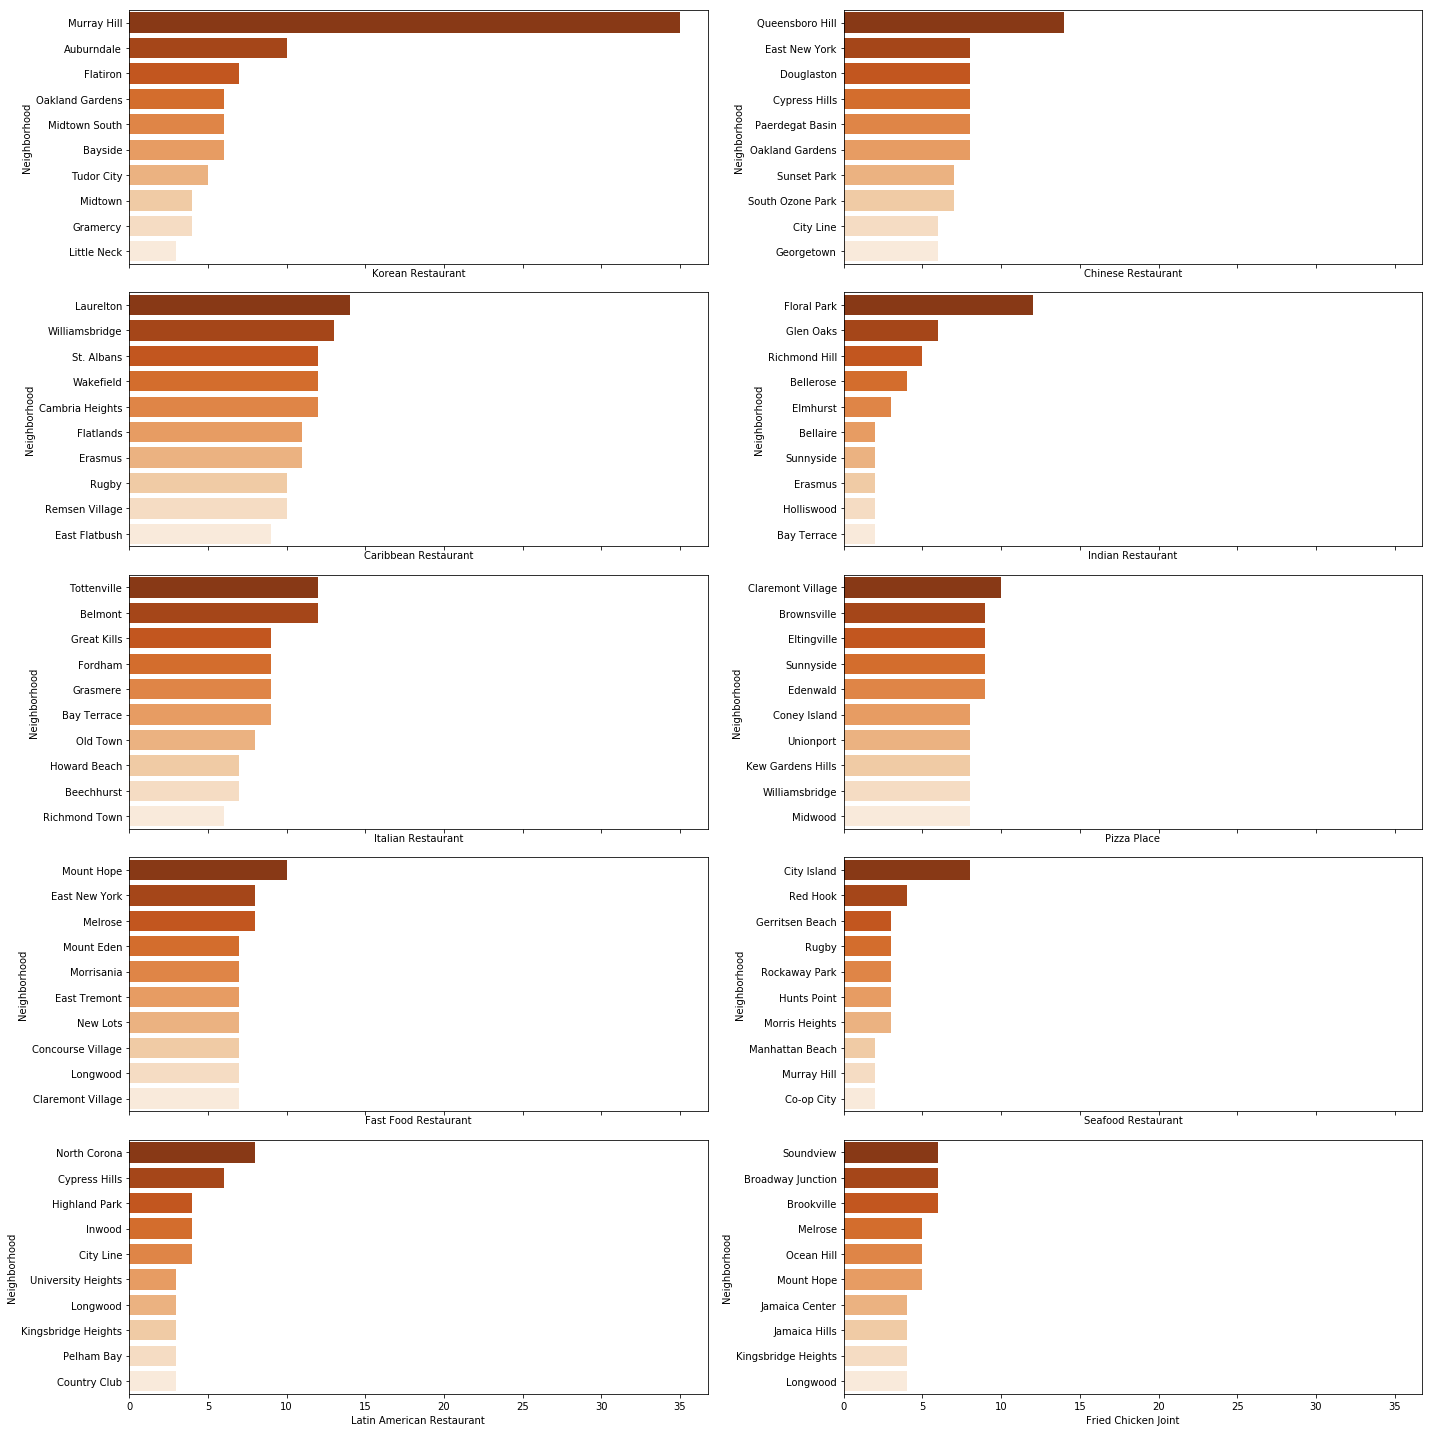

In [45]:
fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Oranges", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

In [46]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head(10)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar
0,Allerton,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.086957,0.130435,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.130435,0.0,0.0,0.00,0.130435,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0,0.043478,0.0,0.0,0.000000,0.173913,0.000000,0.0,0.00000,0.0,0.00,0.00000,0.0,0.0,0.0,0.0,0.000000,0.217391,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.043478,0.00000,0.043478,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,Annadale,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.166667,0.055556,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.055556,0.0,0.00000,0.0,0.00,0.00000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,Arden Heights,0.0,0.0,0.157895,0.0,0.0,0.000000,0.0,0.0,0.052632,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.105263,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.157895,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.105263,0.000000,0.0,0.00000,0.0,0.00,0.00000,0.0,0.0,0.0,0.0,0.000000,0.315789,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.105263,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,Arlington,0.0,0.0,0.105263,0.0,0.0,0.052632,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.052632,0.052632,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.157895,0.0,0.0,0.00,0.052632,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.00000

In [47]:
nyc_grouped.shape

(302, 102)

#### Descending Venues: 
Now we will write a function to sort the venues in descending order, and create a new dataframe to show the top 10 venues for each neighborhood.

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

#create new columns by number of top venues.
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [50]:
#new dataframe.
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

In [51]:
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(11)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Allerton,Pizza Place,Mexican Restaurant,Fast Food Restaurant
1,Annadale,Pizza Place,American Restaurant,Italian Restaurant
2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant
3,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant
4,Arrochar,Italian Restaurant,Pizza Place,Chinese Restaurant
5,Arverne,Chinese Restaurant,Taco Place,Caribbean Restaurant
6,Astoria,Pizza Place,Empanada Restaurant,Thai Restaurant
7,Astoria Heights,Italian Restaurant,Greek Restaurant,Pizza Place
8,Auburndale,Korean Restaurant,Greek Restaurant,Pizza Place
9,Bath Beach,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant


#### Cluster Neighborhoods
Now, we will use k-means to count each neighborhoods cluster. ‘k-means’ is an unsupervised machine learning algorithm which creates clusters of data points aggregated those points together because of certain similarities. We need to find optimal number of clusters for k-means. We can use two methods and graph them to see which one works; the elbow method and silhouette method.

Elbow: calculates the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no significant decrease in sum of squared distances is chosen. Below we will see that elbow method isn't useful to find the optimal number of clusters.

Silhouette: measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [52]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

In [53]:
sum_of_squared_distances = []
K = range(1,100)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

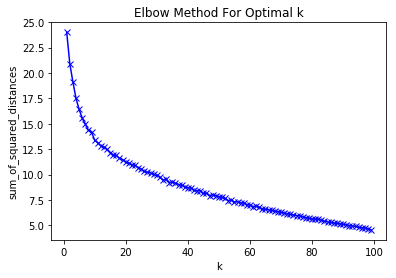

In [54]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [55]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,25)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(nyc_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(nyc_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

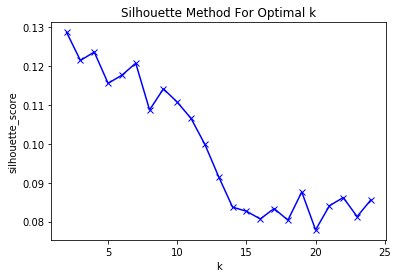

In [56]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

#### k-Means :
The highest values are at k = 2, k = 4, and k = 8. We will use set number of clusters 8, since 2 and 4 clusters will give us very broad classification of the venues. Then, we will create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood. We will also use this data to visualize the resulting clusters.

In [57]:
#number of clusters.
kclusters = 8

#run k-means clustering.
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(nyc_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({6: 71, 4: 70, 0: 56, 3: 41, 2: 29, 1: 25, 5: 9, 7: 1})


In [58]:
#add clustering labels column.
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [59]:
neighborhoods_venues_sorted.head(10)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,0,Allerton,Pizza Place,Mexican Restaurant,Fast Food Restaurant
1,2,Annadale,Pizza Place,American Restaurant,Italian Restaurant
2,2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant
3,0,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant
4,3,Arrochar,Italian Restaurant,Pizza Place,Chinese Restaurant
5,4,Arverne,Chinese Restaurant,Taco Place,Caribbean Restaurant
6,4,Astoria,Pizza Place,Empanada Restaurant,Thai Restaurant
7,3,Astoria Heights,Italian Restaurant,Greek Restaurant,Pizza Place
8,5,Auburndale,Korean Restaurant,Greek Restaurant,Pizza Place
9,4,Bath Beach,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant


In [60]:
#lets combine neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood.
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
nyc_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Borough,Latitude,Longitude
0,0,Allerton,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Bronx,40.865788,-73.859319
1,2,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Staten Island,40.538114,-74.178549
2,2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Staten Island,40.549286,-74.185887
3,0,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Staten Island,40.635325,-74.165104
4,3,Arrochar,Italian Restaurant,Pizza Place,Chinese Restaurant,Staten Island,40.596313,-74.067124


In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 4. Results

In [62]:
required_column_indices = [2,3,7]
required_column = [list(nyc_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

#### Cluster 0, 1 & 2
Cluster 0) Fast Food Restaurant is a dominant occurrence, with Pizza Place number two on the top venues.

Cluster 1) Caribbean Restaurant is a massive venue with 18 occurrences, followed by Pizza Place with 7 occurrences.

Cluster 2) Pizza Place holds a number spot with 27 occurrences for a long shot and no one comes close to it. 

In [63]:
cluster_0 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[1:12]]
cluster_0.head(3)Caribbean

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Borough,Latitude,Longitude
0,Allerton,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Bronx,40.865788,-73.859319
3,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Staten Island,40.635325,-74.165104
17,Bedford Stuyvesant,Pizza Place,Fast Food Restaurant,Caribbean Restaurant,Brooklyn,40.687232,-73.941785


In [64]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------")

Fast Food Restaurant               24
Pizza Place                        17
Caribbean Restaurant                5
Chinese Restaurant                  3
Spanish Restaurant                  1
Southern / Soul Food Restaurant     1
Latin American Restaurant           1
Mexican Restaurant                  1
Filipino Restaurant                 1
Fried Chicken Joint                 1
Eastern European Restaurant         1
Name: 1st Most Common Venue, dtype: int64
---------
Fast Food Restaurant               21
Pizza Place                        12
Fried Chicken Joint                 9
Chinese Restaurant                  5
Mexican Restaurant                  2
Caribbean Restaurant                2
Southern / Soul Food Restaurant     1
Spanish Restaurant                  1
Latin American Restaurant           1
Taco Place                          1
Steakhouse                          1
Name: 2nd Most Common Venue, dtype: int64
---------
-73.895788    1
-73.843203    1
-73.910416    1
-73.858110  

In [65]:
cluster_1 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[1:12]]
cluster_1.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Borough,Latitude,Longitude
36,Brookville,Fried Chicken Joint,Caribbean Restaurant,Pizza Place,Queens,40.660003,-73.751753
37,Brownsville,Pizza Place,Caribbean Restaurant,Chinese Restaurant,Brooklyn,40.663950,-73.910235
41,Cambria Heights,Caribbean Restaurant,Fast Food Restaurant,Mexican Restaurant,Queens,40.692775,-73.735269


In [66]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------")

Caribbean Restaurant    18
Chinese Restaurant       3
Pizza Place              2
American Restaurant      1
Fried Chicken Joint      1
Name: 1st Most Common Venue, dtype: int64
---------
Pizza Place             7
Caribbean Restaurant    6
Fast Food Restaurant    6
Chinese Restaurant      5
Fried Chicken Joint     1
Name: 2nd Most Common Venue, dtype: int64
---------
-73.751753    1
-73.740256    1
-73.948177    1
-73.926882    1
-73.827806    1
-73.867315    1
-74.174645    1
-73.735261    1
-73.758676    1
-73.857446    1
-73.910235    1
-73.929113    1
-73.772588    1
-73.902093    1
-73.916653    1
-73.809865    1
-73.848083    1
-73.936103    1
-73.760421    1
-73.937187    1
-73.863324    1
-73.847201    1
-73.735269    1
-73.790426    1
-73.902335    1
Name: Longitude, dtype: int64
---------


In [67]:
cluster_2 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[1:12]]
cluster_2.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Borough,Latitude,Longitude
1,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Staten Island,40.538114,-74.178549
2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Staten Island,40.549286,-74.185887
16,Bedford Park,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Bronx,40.870185,-73.885512


In [68]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------")

Pizza Place           27
BBQ Joint              1
Seafood Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------
Chinese Restaurant      8
American Restaurant     5
Fast Food Restaurant    4
Sushi Restaurant        2
Italian Restaurant      2
Mexican Restaurant      2
Pizza Place             2
Taco Place              1
Japanese Restaurant     1
Greek Restaurant        1
Asian Restaurant        1
Name: 2nd Most Common Venue, dtype: int64
---------
-74.219831    1
-73.820055    1
-74.164960    1
-73.892138    1
-74.215729    1
-73.973471    1
-73.776133    1
-73.957595    1
-74.205246    1
-73.870742    1
-73.957438    1
-74.187256    1
-73.988683    1
-74.178549    1
-74.111329    1
-74.119181    1
-74.217766    1
-73.881143    1
-74.185887    1
-73.885512    1
-74.164331    1
-74.079553    1
-74.132084    1
-74.097762    1
-73.879370    1
-73.797603    1
-73.820878    1
-74.170794    1
-73.883315    1
Name: Longitude, dtype: int64
---------


#### Cluster 3, 4 & 5

Cluster 3) Italian Restaurant is a dominant occurrence and Pizza Place as number two.

Cluster 4) Pizza Place is a massive venue with 33 occurrences, followed by Chinese Restaurant with 22 occurrences.

Cluster 5) Korean Restaurant holds a number spot with 8 occurrences, followed by American Restaurant with 4 occurrences.

In [69]:
cluster_3 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[1:12]]
cluster_3.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Borough,Latitude,Longitude
4,Arrochar,Italian Restaurant,Pizza Place,Chinese Restaurant,Staten Island,40.596313,-74.067124
7,Astoria Heights,Italian Restaurant,Greek Restaurant,Pizza Place,Queens,40.770317,-73.894680
12,Bay Terrace,Italian Restaurant,Pizza Place,Asian Restaurant,Queens,40.782843,-73.776802


In [70]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------")

Italian Restaurant     32
Pizza Place             7
Mexican Restaurant      1
American Restaurant     1
Seafood Restaurant      1
Name: 1st Most Common Venue, dtype: int64
---------
Pizza Place                15
Italian Restaurant          9
Chinese Restaurant          5
Mexican Restaurant          4
Fast Food Restaurant        3
Japanese Restaurant         2
Asian Restaurant            2
Greek Restaurant            1
New American Restaurant     1
Name: 2nd Most Common Venue, dtype: int64
---------
-73.776802    1
-73.738898    1
-73.854756    1
-74.134057    1
-73.945631    1
-74.067124    1
-73.854018    1
-73.958860    1
-74.149324    1
-73.804365    1
-74.191741    1
-73.813885    1
-74.229504    1
-73.826678    1
-73.888452    1
-74.127272    1
-74.076674    1
-74.080157    1
-74.232158    1
-73.939202    1
-74.087511    1
-74.186223    1
-73.861726    1
-74.246569    1
-73.857547    1
-74.072642    1
-73.814202    1
-74.139166    1
-73.849638    1
-74.201526    1
-74.069805    1


In [71]:
cluster_4 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[1:12]]
cluster_4.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Borough,Latitude,Longitude
5,Arverne,Chinese Restaurant,Taco Place,Caribbean Restaurant,Queens,40.589144,-73.791992
6,Astoria,Pizza Place,Empanada Restaurant,Thai Restaurant,Queens,40.768509,-73.915654
9,Bath Beach,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Brooklyn,40.599519,-73.998752


In [73]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------")

Pizza Place                  33
Chinese Restaurant           22
Fast Food Restaurant          3
Indian Restaurant             3
Sushi Restaurant              2
Mexican Restaurant            2
Thai Restaurant               2
Italian Restaurant            1
Shanghai Restaurant           1
Latin American Restaurant     1
Middle Eastern Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------
Pizza Place                  13
Chinese Restaurant           12
American Restaurant           8
Fast Food Restaurant          7
Italian Restaurant            7
Mexican Restaurant            5
Asian Restaurant              2
Fried Chicken Joint           2
Taco Place                    2
Seafood Restaurant            2
Vietnamese Restaurant         2
Caribbean Restaurant          2
Sushi Restaurant              1
Noodle House                  1
Cantonese Restaurant          1
Empanada Restaurant           1
Russian Restaurant            1
Latin American Restaurant     1
New American Restaur

In [72]:
cluster_5 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[1:12]]
cluster_5.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Borough,Latitude,Longitude
8,Auburndale,Korean Restaurant,Greek Restaurant,Pizza Place,Queens,40.761730,-73.791762
14,Bayside,Korean Restaurant,American Restaurant,Asian Restaurant,Queens,40.766041,-73.774274
97,Flatiron,Korean Restaurant,New American Restaurant,American Restaurant,Manhattan,40.739673,-73.990947


In [74]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------")

Korean Restaurant      8
American Restaurant    1
Chinese Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------
American Restaurant        4
New American Restaurant    2
Korean Restaurant          2
Greek Restaurant           1
Japanese Restaurant        1
Name: 2nd Most Common Venue, dtype: int64
---------
-73.812763    1
-73.978332    1
-73.971219    1
-73.988713    1
-73.754950    1
-73.990947    1
-73.981376    1
-73.791762    1
-73.981669    1
-73.774274    1
Name: Longitude, dtype: int64
---------


# 5. Discussions of the results

To full incorporate the clusters, we have completed 03 analysis; count of Borough, count of 1st Most Common Venue and count of 2nd Most Common Venue.

There is scope to increase this analysis:

-We could look at economical PnL of each venue of restaurant to figure out what cuisine a potential inventor/owner should open.

-We could have also utilized word could library tool to visualize the cuisine type in each borough, the higher number of times specific cuisine word appears in a dataset the bigger and bolder it appears in the world cloud.


# 6. Conclusions

Through the method of machine learning, specially k-Means, we can understand, visualize the data and how the conclusion can be varied based off ever changing data. Segmenting the clusters in New York City helped us see various sides of boroughs and its neighborhoods. Now, we are able to see what are the popular cuisines within each area of New York City. In the future, we can improve our model by looking at daily live dataset. Overall, our data was limited data so our analysis could be biased. But in the future, we may need to get more data and expand the scope of this analysis to get better results. Brooklyn and Manhattan has high concentration of restaurant business.


**The End**